In [332]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import cv2
import re
import string

from tensorflow.python.layers import layers
from tensorflow.keras.layers import Embedding, Flatten,Dropout,SimpleRNN,LSTM,GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from sklearn.preprocessing import LabelBinarizer

from sklearn import preprocessing

from nltk.stem import PorterStemmer, WordNetLemmatizer
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten,Dropout, SimpleRNN,LSTM,GRU
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/esmira23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/esmira23/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/esmira23/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Fully connected neural networks
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [176]:
df = pd.read_csv('heart.csv')
print(f'Dataset size: {df.shape}')
df.head()

Dataset size: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [270]:
x = df.drop('output', axis=1);
y = df.output;

In [271]:
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [285]:
df.output.unique()

array([1, 0])

In [313]:
lb = LabelBinarizer()
yTrain = lb.fit_transform(y_train)
yTest = lb.transform(y_test)

In [315]:
yTrain = to_categorical(yTrain).astype(int)
yTest = to_categorical(yTest).astype(int)

In [323]:
y_train[:2]

221    0
127    1
Name: output, dtype: int64

In [325]:
yTrain[:2]

array([[1, 0],
       [0, 1]])

In [317]:
model = keras.Sequential()
model.add(layers.Dense(256, input_shape=(13,), activation="sigmoid"))   # 1th hiddenlayer
model.add(layers.Dense(128, activation="sigmoid"))                      # 2th hiddenlayer
model.add(layers.Dense(2, activation="softmax"))                        # output layer

In [318]:
sgd = tf.keras.optimizers.legacy.SGD(0.1)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=sgd,
    metrics=["accuracy"]
)

In [320]:
H = model.fit(x_train, yTrain, validation_data=(x_test, yTest), epochs=100, batch_size=8)

Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4906 - val_loss: 0.6728 - val_accuracy: 0.7473
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.6132 - val_loss: 0.7334 - val_accuracy: 0.4505
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5660 - val_loss: 0.7300 - val_accuracy: 0.4505
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5330 - val_loss: 0.6863 - val_accuracy: 0.5495
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6415 - val_loss: 0.6620 - val_accuracy: 0.7253
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6038 - val_loss: 0.6511 - val_accuracy: 0.7033
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5660 - val_loss: 0.7046 - val_accuracy: 0.4505
Epoch 8/100
2

In [326]:
pred = model.predict(x_test, batch_size=8)
print(classification_report(yTest.argmax(axis=1),
    pred.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

12/12 [==============================] - 0s 573us/step
              precision    recall  f1-score   support

           0       0.96      0.54      0.69        41
           1       0.72      0.98      0.83        50

    accuracy                           0.78        91
   macro avg       0.84      0.76      0.76        91
weighted avg       0.83      0.78      0.77        91



### 2. Convolutional neural networks
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [145]:
flowers_train = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=(150, 150),
    batch_size=32,
)

Found 4317 files belonging to 5 classes.
Using 3022 files for training.


In [146]:
flowers_test = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=(150, 150),
    batch_size=32,
)

Found 4317 files belonging to 5 classes.
Using 1295 files for validation.


In [165]:
class_names = flowers_train.class_names

In [154]:
# Extract unique images and labels for visualization
unique_images = []
unique_labels = set()
for images, labels in flowers_train.take(10):  # Assuming 10 batches for diversity
    for i in range(len(labels)):
        label = labels[i].numpy()
        if label not in unique_labels:
            unique_labels.add(label)
            unique_images.append(images[i])

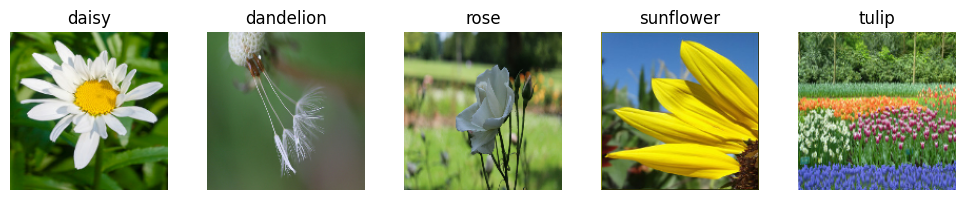

In [156]:
# Display one unique image per flower type
plt.figure(figsize=(10, 2))  # figure size
for i in range(len(unique_images)):
    plt.subplot(1, len(unique_images), i+1)
    plt.imshow(unique_images[i].numpy().astype('uint8'))
    plt.title(class_names[list(unique_labels)[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [150]:
# Preprocess the data (normalize pixel values)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
flowers_normilized = flowers_train.map(lambda x, y: (normalization_layer(x), y))

In [157]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [158]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 82944)             0         
                                                                 
 dense_30 (Dense)            (None, 128)             

In [167]:
model.fit(
    flowers_train, 
    epochs=12, 
    verbose=1,
    validation_data=flowers_test
)

Epoch 1/12
95/95 [==============================] - 13s 134ms/step - loss: 0.1338 - accuracy: 0.9626 - val_loss: 4.1321 - val_accuracy: 0.3923
Epoch 2/12
95/95 [==============================] - 12s 127ms/step - loss: 0.1936 - accuracy: 0.9666 - val_loss: 4.0212 - val_accuracy: 0.4139
Epoch 3/12
95/95 [==============================] - 12s 129ms/step - loss: 0.1752 - accuracy: 0.9547 - val_loss: 4.3223 - val_accuracy: 0.3985
Epoch 4/12
95/95 [==============================] - 13s 136ms/step - loss: 0.1050 - accuracy: 0.9725 - val_loss: 4.1641 - val_accuracy: 0.4093
Epoch 5/12
95/95 [==============================] - 13s 140ms/step - loss: 0.0958 - accuracy: 0.9775 - val_loss: 4.2645 - val_accuracy: 0.3853
Epoch 6/12
95/95 [==============================] - 13s 139ms/step - loss: 0.1577 - accuracy: 0.9619 - val_loss: 4.2714 - val_accuracy: 0.3452
Epoch 7/12
95/95 [==============================] - 13s 138ms/step - loss: 0.1787 - accuracy: 0.9593 - val_loss: 4.1912 - val_accuracy: 0.3691

In [169]:
score = model.evaluate(flowers_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.869704723358154
Test accuracy: 0.38146719336509705


### 3. Recurrent neural networks
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

In [352]:
dataset = pd.read_csv("tweets.csv")
dataset.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [353]:
dataset = dataset[['text', 'sentiment']]
dataset.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [354]:
dataset = dataset.dropna()
dataset.sentiment.value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [355]:
stop_words = stopwords.words('english')
def text_preprocessing(text):
    text = text.lower()
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)

    for i in word_tokens:
        if i not in stop_words:
                text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # remove punctuations
                
                # remove extra spaces
                text = re.sub('\n', ' ', text)
                text = re.sub('\s{2,}',' ', text)
                text = wordnet_lemmatizer.lemmatize(text)
                
                text = re.sub('[^a-zA-Z\s]', '', text) # remove non-Latin characters
    return text

dataset['text'] = dataset['text'].apply(text_preprocessing)

In [356]:
x_train, x_test, y_train, y_test = train_test_split(dataset['text'], dataset['sentiment'], test_size=0.2, random_state=42)

In [357]:
# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

# Pad the sequences so they all have the same length
x_train = pad_sequences(sequences, maxlen=150)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=150)

# Create one-hot encoded labels
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [362]:
# Build the model
model = keras.Sequential()
model.add(layers.Embedding(1000, 64, input_length=150))
model.add(layers.SpatialDropout1D(0.3))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

In [363]:
# Compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [365]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/10
1100/1100 [==============================] - 31s 29ms/step - loss: 0.6027 - accuracy: 0.7494 - val_loss: 0.7525 - val_accuracy: 0.6877
Epoch 2/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5839 - accuracy: 0.7618 - val_loss: 0.7652 - val_accuracy: 0.6814
Epoch 3/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5727 - accuracy: 0.7656 - val_loss: 0.7678 - val_accuracy: 0.6850
Epoch 4/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5531 - accuracy: 0.7712 - val_loss: 0.7744 - val_accuracy: 0.6830
Epoch 5/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5391 - accuracy: 0.7763 - val_loss: 0.8220 - val_accuracy: 0.6789
Epoch 6/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5267 - accuracy: 0.7842 - val_loss: 0.8042 - val_accuracy: 0.6805
Epoch 7/10
1100/1100 [==============================] - 31s 28ms/step - loss: 0.5167 - accuracy: 0.7882 - val_loss: 0.8389 -

In [366]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8637424111366272
Test accuracy: 0.6855894923210144
